In [29]:
import numpy as np
from math import sin, sqrt, pi, e, exp

## Problem 1

In [19]:
def V(t):
    return 1000*sin(sqrt(pi*t))

def f(x,y):
    R = 1000 # Ohms
    C = 0.002 # F
    return V(x)/R - y/(R*C)
    

In [23]:
# Runge-Kutta method

def k1(x,y,h):
    return h*f(x=x,y=y)

def k2(x,y,h):
    K1 = k1(x=x,y=y,h=h)
    return h*f(x=x+h/2,y=y+K1/2)

def k3(x,y,h):
    K2 = k2(x=x,y=y,h=h)
    return h*f(x=x+h/2,y=y+K2/2)

def k4(x,y,h):
    K3 = k2(x=x,y=y,h=h)
    return h*f(x=x+h,y=y+K3)

def RK4(x,y,h):
    '''
    Runs 4xh order Runge-Kuxxa mexhod to find y(x') at x'=(x+h) given x, y(x), and h.
    '''
    return y + k1(x=x,y=y,h=h)/6 + k2(x=x,y=y,h=h)/3 \
             + k3(x=x,y=y,h=h)/3 + k4(x=x,y=y,h=h)/6
    

In [26]:
# k4 calculation from by-hand derivation, to check against programmed solution
0.1*sin(sqrt(pi*0.1)) + 0.004875*sin(sqrt(0.05*pi)) - 0.19024375

-0.13520091347565355

In [27]:
RK4(x=0,y=4,h=0.1)

3.8388692837783074

## Problem 2

In [44]:
def fX(x):
    if 0 <= x <= 1:
        return 1/e * exp(x) * (x+1)
    else:
        return 0
    
def array1D_fX(x):
    ''' Broadcast fX(x) elementwise through 1D array.'''
    return np.array([fX(elem) for elem in x])

In [45]:
import matplotlib.pyplot as plt

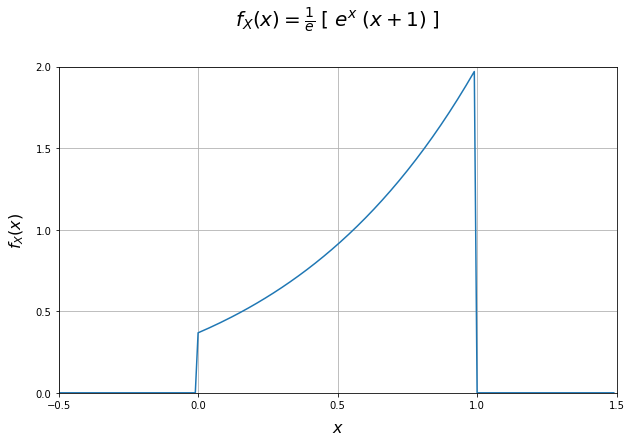

In [100]:
fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
ax.margins(x=100,y=10)

# Params
xlims = [-0.5,1.5]
ylims = [0,2]
xtick_step = 0.5
ytick_step = 0.5

# Plotting
x = np.arange(xlims[0],xlims[1],0.01)
ax.plot(x,(array1D_fX(x)))

# Formatting
plt.title(r'$f_X(x)=\frac{1}{e} \; [ \; e^x \; (x+1) \; ]$', fontsize=20, pad=40)
ax.set(xlim=xlims, ylim=ylims)
ax.set_xlabel(r'$x$', fontsize=16, labelpad=10)
ax.set_ylabel(r'$f_X(x)$', fontsize=16, labelpad=10)
ax.xaxis.set(ticks=np.arange(xlims[0],xlims[1]+xtick_step, xtick_step))
ax.yaxis.set(ticks=np.arange(ylims[0],ylims[1]+ytick_step, ytick_step))
ax.grid('on')

In [113]:
# 2a -- Right Rectangular sum

h=0.1
X = np.arange(0,1,h)
tot = 0
for x in X:
    tot += fX(x+h)
    
right_rect_est = tot * h
right_rect_est
    

1.083492405630938

In [114]:
# 2b -- Midpoint sum

h=0.1
X = np.arange(0,1,h)

summation = 0
for x in X:
    summation += fX(x+h/2)
    
midpoint_est = summation * h
midpoint_est

0.9990569948560943

In [115]:
# 2b -- Trapezoidal sum

h=0.1
X = np.arange(0,1,h)

summation = 0
for x in X:
    summation += 1/2 * (fX(x) + fX(x+h))
    
trapezoid_est = summation * h
trapezoid_est

1.0018863776895104

## Problem 3

In [163]:
def y_a(x):
    return 1 - sqrt(2/x+2)

def dydx(x,y):
    return 1/((x**2)*(1-y))

In [ ]:
# Plot analytical solution

fig, ax = plt.subplots(figsize=(10,6), facecolor='white')

# # Params
xlims = [0,1]
ylims = [-20,0]
x_major_tick = 0.2
x_minor_tick = 0.025
y_major_tick = 10

# # Plotting
xstep = 0.001
x = np.arange(1,0,-xstep)
ax.plot(x, [y_a(xx) for xx in x])

# Formatting
plt.title('Analytical solution to ' + r'$\frac{dy}{dx} \, = \, \frac{1}{x^2(1-y)}$', fontsize=20, pad=40)
ax.set(xlim=xlims, ylim=ylims)
ax.set_xlabel(r'$x$', fontsize=16, labelpad=10)
ax.set_ylabel(r'$y(x)$', fontsize=16, labelpad=10)

ax.xaxis.set_major_locator(MultipleLocator(x_major_tick))
ax.xaxis.set_major_formatter(FormatStrFormatter('%1.1f'))
ax.xaxis.set_minor_locator(MultipleLocator(x_minor_tick))

ax.grid('on')
ax.grid('on',which='minor',color=[0.9,0.9,0.9])


In [164]:
# Euler's Method

def f(x,y):
    return dydx(x,y)

def EM_step(x,y,step):
    return y + step*f(x,y)

step = -0.05
x = 1
y = -1
for x in np.arange(1,0,step):
    y = EM_step(x,y,step)
    
print(y)

-8.124934344340135


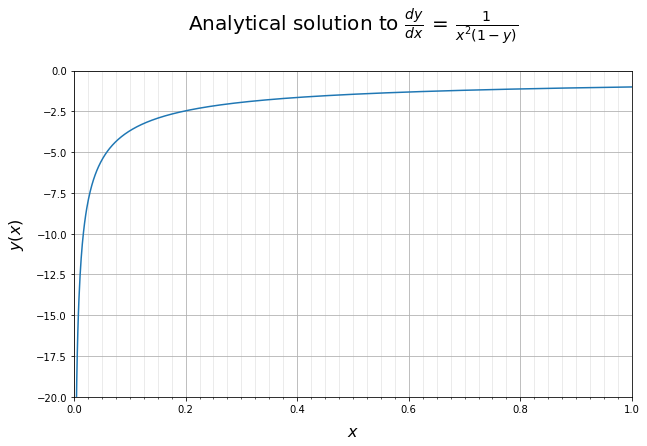

In [184]:
# Runge-Kutta method
step = -0.05
x = 1
y = -1
for x in np.arange(1,0,step):
    y = RK4(x,y,step)
    
print(y)

-7.068182004270559e+26


In [259]:
# Richardson Extrapolation

def RE(x,y,H,n=2):
    h = H/n # inner step-size
    
    # First mini-step, Modified midpoint method
    z0 = y
    z1 = z0 + h*f(x,z0)
    # initialize iterating variables
    zm = z1
    zlast = z0 
    
    for m in range(1,n):
        znext = zlast + 2*h*f(x+m*h,zm)
        # Update for incrementing m
        zlast = zm
        zm = znext
        
    # m=n, and zm and zlast have been updated by last lines of loop
    yn = 1/2 * ( zm + zlast + h*f(x+H,zm) )
    return yn
    
    


x0 = 1
y0 = -1

x = x0
yn = y0
n = 2
H = -0.05

xgoal = 0

ERROR_BOUND = 1
ITERS_MAX = 1000

iters = 0
while np.abs(x-xgoal) > np.abs(H/2): # while we are greater than a macro-step from the
                                     # goal (halved to avoid floating point error)
    x = x+H
    y = yn
    n = 2
    
    # Run for n=2 to initialize error table
    yn = RE(x=x,y=y,H=H,n=2)
    # Start extrapolation table
    ex_table = []
    ex_table.append(np.empty([n+2],float))
    ex_table[0][0] = yn

    
    try:
        ERROR_BOUND = np.abs(y_a(x))/20 # est should be w/i 5% of solution to move on
        error = np.abs(y_a(x)-yn)
    except ValueError:
        # Will occur when x=0, since y_a(0) divides by zero -- instead just use previous error
        ERROR_BOUND = error
        # Initialize error as infinitely high, since we need to run another mod. mp. in order
        # to estimate error from extrapolation table
        error = float('inf')
    while error > ERROR_BOUND and iters < ITERS_MAX: # iteration max to avoid hanging
        n += 2
        yn = RE(x=x,y=y,H=H,n=n)
        if x > 0.001: # If x is positive nonzero, y(x) should be finite, so we can 
                      # check our estimate against the analytical solution directly.
            error = np.abs(y_a(x)-yn)
        else:
            # Extrapolation table to determine error
            ex_table.append(np.empty([n,1]))
            for j in range(1,n-1):
                # calculate dif between values at j-1 and j in last two rows
                dif = (2*ex_table[-1][j-1]-ex_table[-2][j-1]) / (n/(n-2)**2 - 1) 
                # assign value at j in last row
                ex_table[-1][j] = ex_table[-1][j-1] + dif 
            # Difference between consecutive columns in final row is error estimate
            error = np.abs(dif[0]) 
    
        iters += 1

yn


-7.454836751011965e+27

In [260]:
x

-3.191891195797325e-16